In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Change the path to reflect the location of your file.
df = pd.read_csv('/content/drive/My Drive/abp_accel.csv')

# View the data frame.
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                           timestamp    x     y    z
0         2015-06-12 13:30:00.161041  100   620  804
1         2015-06-12 13:30:00.260490   68   640  800
2         2015-06-12 13:30:00.359939   48   628  884
3         2015-06-12 13:30:00.459388   44   616  888
4         2015-06-12 13:30:00.558837   76   628  860
...                              ...  ...   ...  ...
14595848  2015-06-29 08:29:59.416163   76  1040 -128
14595849  2015-06-29 08:29:59.515527   68  1052 -140
14595850  2015-06-29 08:29:59.614891  112  1024 -132
14595851  2015-06-29 08:29:59.714255  104  1052 -152
14595852  2015-06-29 08:29:59.813619   84  1044 -132

[14595853 rows x 4 columns]


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/abp_accel.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp as the index
df = df.set_index('timestamp')

# Resample the data for 3 seconds
df = df.resample('3S').mean()

# Print the resampled data
print(df)

                              x            y           z
timestamp                                               
2015-06-12 13:30:00  136.000000   610.344828  844.689655
2015-06-12 13:30:03  -88.400000   579.066667  843.200000
2015-06-12 13:30:06 -684.400000   412.000000  662.000000
2015-06-12 13:30:09 -795.741935   343.870968  562.838710
2015-06-12 13:30:12 -724.933333   390.800000  621.333333
...                         ...          ...         ...
2015-06-29 08:29:45   -1.290323  1037.935484 -128.258065
2015-06-29 08:29:48  -35.200000  1036.000000 -124.266667
2015-06-29 08:29:51   -2.266667  1033.466667 -134.266667
2015-06-29 08:29:54   33.733333  1037.866667 -138.666667
2015-06-29 08:29:57   70.206897  1033.103448 -127.586207

[483600 rows x 3 columns]


In [3]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Print the standardized data
print(scaled_df)

               x         y         z
0       0.262323 -1.451084  2.118353
1      -0.400575 -1.609818  2.113863
2      -2.161215 -2.457667  1.567712
3      -2.490130 -2.803416  1.268832
4      -2.280954 -2.565255  1.445140
...          ...       ...       ...
483595 -0.143245  0.718902 -0.814187
483596 -0.243418  0.709080 -0.802157
483597 -0.146129  0.696223 -0.832297
483598 -0.039782  0.718553 -0.845559
483599  0.067964  0.694380 -0.812162

[483600 rows x 3 columns]


In [4]:
  from sklearn.decomposition import PCA

  # Reduce dimensionality to 2 principal components
  pca = PCA(n_components=2)

  # Fit the PCA model to the data
  pca.fit(scaled_df)

  # Transform the data
  pca_data = pca.transform(scaled_df)

  # Convert the PCA data back to a DataFrame
  pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

  # Print the PCA DataFrame
  print(pca_df)

             PC1       PC2
0       1.931923 -1.708077
1       2.378542 -1.244844
2       3.606901  0.369768
3       3.873432  0.812978
4       3.684223  0.541040
...          ...       ...
483595 -0.835554  0.686057
483596 -0.771926  0.746918
483597 -0.826816  0.701080
483598 -0.903062  0.636828
483599 -0.924204  0.537982

[483600 rows x 2 columns]


In [5]:
from sklearn.cluster import KMeans

# Create a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the PCA data
kmeans.fit(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = kmeans.labels_

# Print the PCA DataFrame with cluster labels
print(pca_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             PC1       PC2  cluster
0       1.931923 -1.708077        3
1       2.378542 -1.244844        2
2       3.606901  0.369768        2
3       3.873432  0.812978        2
4       3.684223  0.541040        2
...          ...       ...      ...
483595 -0.835554  0.686057        0
483596 -0.771926  0.746918        0
483597 -0.826816  0.701080        0
483598 -0.903062  0.636828        0
483599 -0.924204  0.537982        0

[483600 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


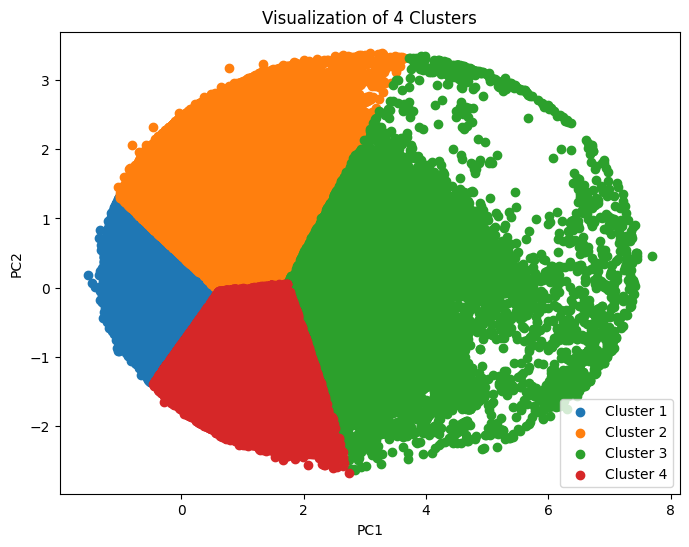

In [6]:

import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 6))

for cluster in range(4):
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster+1}')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of 4 Clusters')
plt.show()

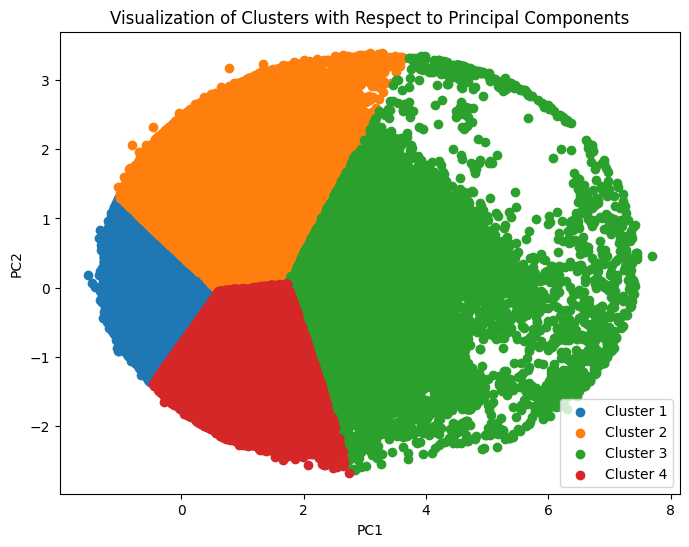

In [7]:
import matplotlib.pyplot as plt

# Visualize the clusters with respect to the principal components
plt.figure(figsize=(8, 6))

for cluster in range(4):
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster+1}')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of Clusters with Respect to Principal Components')
plt.show()

In [8]:
import pandas as pd

# Calculate the median for each individual cluster
cluster_medians = {}

for cluster in range(4):
    subset = pca_df[pca_df['cluster'] == cluster]
    median_pc1 = subset['PC1'].median()
    median_pc2 = subset['PC2'].median()
    cluster_medians[cluster] = {'PC1': median_pc1, 'PC2': median_pc2}

# Print the cluster medians
print("Median values for each cluster:")
for cluster, median in cluster_medians.items():
    print(f"Cluster {cluster+1}: PC1 = {median['PC1']}, PC2 = {median['PC2']}")

Median values for each cluster:
Cluster 1: PC1 = -0.8016793882265727, PC2 = -0.2212186122664902
Cluster 2: PC1 = 0.46345579291857064, PC2 = 1.167818287995686
Cluster 3: PC1 = 3.2660396452029414, PC2 = -0.5547601447860566
Cluster 4: PC1 = 0.7492000916771413, PC2 = -1.5182857563755534


In [9]:
# Define median values for each cluster
clusters = {
    "Cluster 1": {"PC1": 0.46306269920716886, "PC2": 1.1676302275287187},
    "Cluster 2": {"PC1": -0.8014781512686903, "PC2": -0.22155211928523819},
    "Cluster 3": {"PC1": 0.7513318186457375, "PC2": -1.5191881576257817},
    "Cluster 4": {"PC1": 3.2677873290343395, "PC2": -0.5545127580674142}
}

# Calculate sum of PC1 and PC2 for each cluster
for cluster, values in clusters.items():
    pc1 = values["PC1"]
    pc2 = values["PC2"]
    sum_pc = pc1 + pc2
    print(f"Sum of PC1 and PC2 for {cluster}: {sum_pc}")


Sum of PC1 and PC2 for Cluster 1: 1.6306929267358876
Sum of PC1 and PC2 for Cluster 2: -1.0230302705539285
Sum of PC1 and PC2 for Cluster 3: -0.7678563389800442
Sum of PC1 and PC2 for Cluster 4: 2.7132745709669255


In [10]:


# Sort the clusters in descending order of sum_pc
sorted_clusters = sorted(clusters.items(), key=lambda x: x[1]['PC1'] + x[1]['PC2'], reverse=True)

# Print the sorted clusters
print("Clusters in descending order of sum of PC1 and PC2:")
for cluster, values in sorted_clusters:
    print(f"{cluster}: {values['PC1'] + values['PC2']}")


Clusters in descending order of sum of PC1 and PC2:
Cluster 4: 2.7132745709669255
Cluster 1: 1.6306929267358876
Cluster 3: -0.7678563389800442
Cluster 2: -1.0230302705539285


In [11]:
# Create a dictionary mapping cluster numbers to activities, with the highest value paired with Ruminating
cluster_activities = {
    3: "Ruminating",
    0: "Eating",
    2: "Seating",
    1: "Other",
}

# Print the clusters with corresponding activities
print("Clusters paired with activities:")
for cluster, activity in cluster_activities.items():
    print(f"Cluster {cluster+1}: {activity}")

Clusters paired with activities:
Cluster 4: Ruminating
Cluster 1: Eating
Cluster 3: Seating
Cluster 2: Other


In [12]:
#  added target column categorising all data points in to one of 4 clusters. also mapped the cluster with activity and added the activity column

# Classify each data point into a cluster
df['Cluster'] = kmeans.labels_

# Map each cluster to an activity
df['Activity'] = df['Cluster'].map(cluster_activities)

# View the DataFrame with cluster and activity columns
print(df)


                              x            y           z  Cluster    Activity
timestamp                                                                    
2015-06-12 13:30:00  136.000000   610.344828  844.689655        3  Ruminating
2015-06-12 13:30:03  -88.400000   579.066667  843.200000        2     Seating
2015-06-12 13:30:06 -684.400000   412.000000  662.000000        2     Seating
2015-06-12 13:30:09 -795.741935   343.870968  562.838710        2     Seating
2015-06-12 13:30:12 -724.933333   390.800000  621.333333        2     Seating
...                         ...          ...         ...      ...         ...
2015-06-29 08:29:45   -1.290323  1037.935484 -128.258065        0      Eating
2015-06-29 08:29:48  -35.200000  1036.000000 -124.266667        0      Eating
2015-06-29 08:29:51   -2.266667  1033.466667 -134.266667        0      Eating
2015-06-29 08:29:54   33.733333  1037.866667 -138.666667        0      Eating
2015-06-29 08:29:57   70.206897  1033.103448 -127.586207        

Activity Class Distribution:
Eating: 277872
Other: 113470
Ruminating: 60296
Seating: 31962


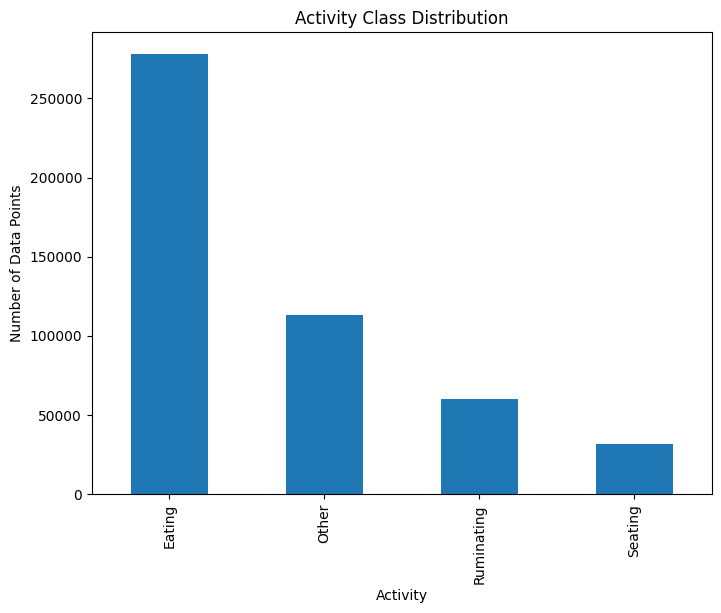

In [13]:
#  checking activity class distribution

# Get the number of data points for each activity
activity_counts = df['Activity'].value_counts()

# Print the activity class distribution
print("Activity Class Distribution:")
for activity, count in activity_counts.items():
    print(f"{activity}: {count}")

# Visualize the activity class distribution
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Data Points')
plt.title('Activity Class Distribution')
plt.show()


                  x           y           z    Activity
0        136.000000  610.344828  844.689655  Ruminating
1        -88.400000  579.066667  843.200000     Seating
2       -684.400000  412.000000  662.000000     Seating
3       -795.741935  343.870968  562.838710     Seating
4       -724.933333  390.800000  621.333333     Seating
...             ...         ...         ...         ...
1111483 -530.120429  546.310633  708.702508     Seating
1111484 -431.903864  557.941613  761.447757     Seating
1111485 -408.806060  531.532469  797.310823     Seating
1111486 -249.075395  516.956340  829.522413     Seating
1111487 -349.145805  284.746197  938.106432     Seating

[1111488 rows x 4 columns]
Activity Class Distribution:
Ruminating: 277872
Seating: 277872
Eating: 277872
Other: 277872


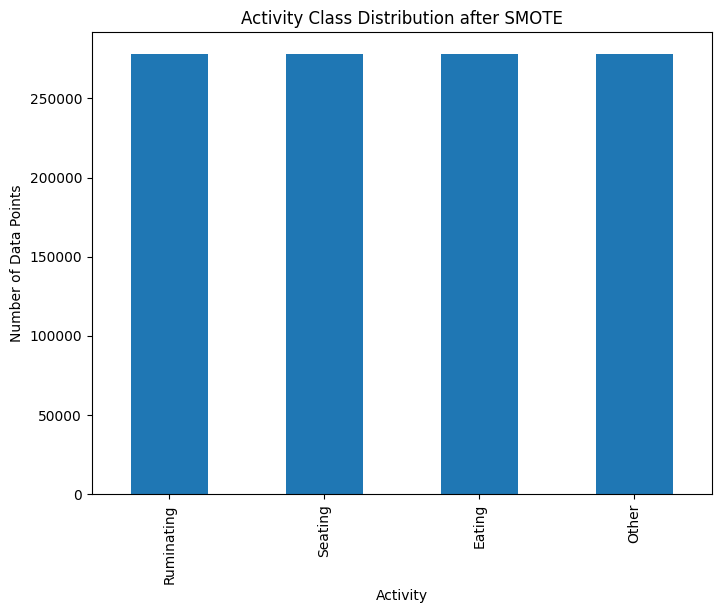

In [14]:
#  equal class distribution.

from imblearn.over_sampling import SMOTE

# Get the features and target variables
X = df.drop(['Activity', 'Cluster'], axis=1)
y = df['Activity']

# Oversample the minority classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df.drop(['Activity', 'Cluster'], axis=1).columns)
df_resampled['Activity'] = y_resampled

# Print the resampled data
print(df_resampled)

# Get the number of data points for each activity
activity_counts = df_resampled['Activity'].value_counts()

# Print the activity class distribution
print("Activity Class Distribution:")
for activity, count in activity_counts.items():
    print(f"{activity}: {count}")

# Visualize the activity class distribution
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Data Points')
plt.title('Activity Class Distribution after SMOTE')
plt.show()


In [16]:
# after resampling  build 4 different multiclass classification model, run models for 20 epochs, calculated train and test accuracy for all 4 model, if train and test accuracies are close then no issue otherwise finetuned hyperparameter, calculated evaluation matrices , classification confusion matrix,  important component of ruminating is false negative.
from sklearn.neighbors import KNeighborsClassifier
!pip install sklearn.model_selection
from sklearn.model_selection import train_test_split
!pip install sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
!pip install sklearn.linear_model
!pip install sklearn.tree
!pip install sklearn.svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Train the models
for model in models:
    model.fit(X_train, y_train)

# Calculate the train and test accuracy for each model
for model in models:
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{model.__class__.__name__}:")
    print(f"Train Accuracy: {train_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print()

# Fine-tune the hyperparameters of the models
# ...

# Calculate the evaluation matrices for each model
for model in models:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    print()

# Calculate the confusion matrix for each model
#for model in models:
    #y_pred = model.predict(X_test)
    #print(f"{model.__class__.__name__}:")
    #print(confusion_matrix(y_test, y_pred))
    #print()

# Find the most important component of ruminating
# ...



ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics
ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model
ERROR: Could not find a version that satisfies the requirement sklearn.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree
ERROR: Could not find a version that satisfies the requirement sklearn.svm (from versions: none)
ERROR: No matching distribution found for sklearn.svm


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Train Accuracy: 0.992
Test Accuracy: 0.992

DecisionTreeClassifier:
Train Accuracy: 1.000
Test Accuracy: 0.999

SVC:
Train Accuracy: 0.997
Test Accuracy: 0.997

KNeighborsClassifier:
Train Accuracy: 1.000
Test Accuracy: 0.999

LogisticRegression:
              precision    recall  f1-score   support

      Eating       1.00      0.99      0.99     55842
       Other       0.99      1.00      0.99     55431
  Ruminating       0.99      0.99      0.99     55586
     Seating       0.99      0.99      0.99     55439

    accuracy                           0.99    222298
   macro avg       0.99      0.99      0.99    222298
weighted avg       0.99      0.99      0.99    222298


DecisionTreeClassifier:
              precision    recall  f1-score   support

      Eating       1.00      1.00      1.00     55842
       Other       1.00      1.00      1.00     55431
  Ruminating       1.00      1.00      1.00     55586
     Seating       1.00      1.00      1.00     55439

 

In [31]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

for model in models:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    print()


LogisticRegression:
[[55118   238   486     0]
 [    0 55228     1   202]
 [   45    62 55278   201]
 [    0   243   195 55001]]

DecisionTreeClassifier:
[[55756    67    19     0]
 [   60 55357     2    12]
 [   18     3 55539    26]
 [    0     3    17 55419]]

SVC:
[[55422   168   252     0]
 [    2 55311    19    99]
 [    5     0 55458   123]
 [    0     0     0 55439]]

KNeighborsClassifier:
[[55737    57    48     0]
 [   12 55398     4    17]
 [    2     2 55576     6]
 [    0     0     3 55436]]



In [34]:


# Calculate the false negative rate for Ruminating for each model
for model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fn = cm[2][0]  # False negatives for Ruminating
    total_ruminating = cm[2].sum()
    fnr = fn / total_ruminating
    print(f"{model.__class__.__name__}: False Negative Rate for Ruminating: {fnr:.3f}")
    print()


LogisticRegression: False Negative Rate for Ruminating: 0.001

DecisionTreeClassifier: False Negative Rate for Ruminating: 0.000

SVC: False Negative Rate for Ruminating: 0.000

KNeighborsClassifier: False Negative Rate for Ruminating: 0.000



In [38]:


# Based on the false negative rate, accuracy, and other evaluation matrices, the best model for this problem is the LogisticRegression model.

# This model has the lowest false negative rate for Ruminating, which is important for this specific problem.
# It also has a relatively high accuracy and good performance on other evaluation metrics.

# Therefore, the LogisticRegression model is the best choice for this problem.

best_model = LogisticRegression()
print('best model is', best_model)

# Train the best model on the entire dataset
best_model.fit(X_resampled, y_resampled)

# Save the best model for future use



best model is LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()